# Análise de Dados de Poluição e Sintomas em Osasco

Este notebook integra dados de poluição atmosférica e sintomas reportados na cidade de Osasco, com o objetivo de investigar possíveis correlações entre eles. Serão utilizados gráficos, matrizes de correlação e outras visualizações para facilitar a análise.

In [16]:
#!pip install import-ipynb
#!pip install scikit-learn
#!pip install sklearn.preprocessing

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
import numpy as np
from carregar import df_poluicao_cidade, df_cidade_sintomas

<string>:3: DtypeWarning: Columns (15,53,91,93,175,178) have mixed types. Specify dtype option on import or set low_memory=False.


In [18]:
print(df_poluicao_cidade.columns)
print(df_cidade_sintomas.columns)

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['DT_NOTIFIC', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')


In [19]:
# Converte a coluna 'date' do DataFrame de poluição para o formato de data, considerando o formato dia/mês/ano.
df_poluicao_cidade['date'] = pd.to_datetime(df_poluicao_cidade['date'], dayfirst=True) 
# Converte a coluna 'DT_NOTIFIC' do DataFrame de sintomas também para o formato de data, considerando o formato dia/mês/ano.
df_cidade_sintomas['DT_NOTIFIC'] = pd.to_datetime(df_cidade_sintomas['DT_NOTIFIC'], dayfirst=True)

# Renomeia a coluna 'date' para 'data' no DataFrame de poluição, padronizando o nome da coluna de data.
df_poluicao_cidade = df_poluicao_cidade.rename(columns={'date': 'data'})
# Renomeia a coluna 'DT_NOTIFIC' para 'data' no DataFrame de sintomas, para permitir o merge com base em uma coluna comum.
df_cidade_sintomas = df_cidade_sintomas.rename(columns={'DT_NOTIFIC': 'data'})

C:\Users\50749314877\AppData\Local\Temp\ipykernel_2700\4027704679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cidade_sintomas['DT_NOTIFIC'] = pd.to_datetime(df_cidade_sintomas['DT_NOTIFIC'], dayfirst=True)


In [20]:
# Realiza a junção (merge) dos dois DataFrames com base na coluna 'data',
# unindo as informações de poluição e sintomas registradas na mesma data.
df_completo = pd.merge(df_poluicao_cidade, df_cidade_sintomas, on='data', how='inner')
print(df_poluicao_cidade.columns)
print(df_cidade_sintomas.columns)
print(df_completo.columns)

Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['data', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')
Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'FEBRE',
       'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
       'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')


In [21]:
# Novo DataFrame 
print(df_completo)

          data  pm25  pm10  o3  no2  so2  co  FEBRE  TOSSE  GARGANTA  \
0   2024-01-01    33    20        7    1   2    2.0    2.0       2.0   
1   2024-01-02    54    18       12        3    2.0    1.0       2.0   
2   2024-01-03    54    19       12        4    1.0    1.0       2.0   
3   2024-01-04    37    10        7        3    2.0    1.0       2.0   
4   2024-01-04    37    10        7        3    1.0    1.0       2.0   
..         ...   ...   ...  ..  ...  ...  ..    ...    ...       ...   
980 2024-12-28    42    19       16        5    1.0    1.0       2.0   
981 2024-12-29    54    12       12        3    1.0    2.0       2.0   
982 2024-12-30    43                            NaN    2.0       2.0   
983 2024-12-30    43                            NaN    1.0       2.0   
984 2024-12-30    43                            2.0    2.0       2.0   

     DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  VOMITO  DOR_ABD  FADIGA  \
0         1.0        1.0        1.0       2.0     2.0      2.

### Tratando e normalizando as colunas

In [22]:
# Verificar o tipo das colunas
print('Tipo das colunas \n', df_completo.dtypes)

Tipo das colunas 
 data         datetime64[ns]
 pm25                object
 pm10                object
 o3                  object
 no2                 object
 so2                 object
 co                  object
FEBRE               float64
TOSSE               float64
GARGANTA            float64
DISPNEIA            float64
DESC_RESP           float64
SATURACAO           float64
DIARREIA            float64
VOMITO              float64
DOR_ABD             float64
FADIGA              float64
PERD_OLFT           float64
PERD_PALA           float64
OUTRO_SIN           float64
dtype: object


In [23]:
# Remover espaços extras nos nomes das colunas
df_completo.columns = df_completo.columns.str.strip()

# Verificar o número de valores não numéricos (NaN) em cada coluna
print('Valores não numéricos em cada coluna: \n', df_completo[['pm25', 'pm10','no2', 'so2', 'co',
                   'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','DIARREIA', 
                   'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']].isna().sum())

Valores não numéricos em cada coluna: 
 pm25          0
pm10          0
no2           0
so2           0
co            0
FEBRE        28
TOSSE        29
GARGANTA     41
DISPNEIA     25
DESC_RESP    20
SATURACAO    26
DIARREIA     35
VOMITO       36
DOR_ABD      37
FADIGA       38
PERD_OLFT    38
PERD_PALA    40
dtype: int64


In [24]:
#Excluindo colunas de pouca influência
df_completo.drop(columns=['o3', 'OUTRO_SIN'], inplace=True)

# Substituir qualquer string vazia ou espaços por NaN, e garantir que as células sejam numéricas
df_completo[['pm25', 'pm10','no2', 'so2', 'co']] = df_completo[['pm25', 'pm10','no2', 'so2', 'co']].replace(r'^\s*$', float('nan'), regex=True)

# Tentar converter as colunas para numérico e forçar qualquer valor inválido para NaN
df_completo[['pm25', 'pm10','no2', 'so2', 'co']] = df_completo[['pm25', 'pm10','no2', 'so2', 'co']].apply(pd.to_numeric, errors='coerce')

# Se houver valores NaN, preencher com a média de cada coluna
df_completo[['pm25', 'pm10','no2', 'so2', 'co',
                   'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','DIARREIA', 
                   'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']] = df_completo[['pm25', 'pm10','no2', 'so2', 'co', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO','DIARREIA',
                                                                                            'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']].apply(lambda x: x.fillna(x.mean()))

# Seleciona as colunas a serem normalizadas (exceto 'data')
colunas_para_normalizar = df_completo.columns.difference(['data'])

# Inicializa o normalizador
scaler = MinMaxScaler()

# Aplica a normalização nas colunas selecionadas
df_normalizado = df_completo.copy()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(df_normalizado[colunas_para_normalizar])

In [25]:
# Visualiza o resultado
display(df_normalizado)

,data,pm25,pm10,no2,so2,co,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,2024-01-01,0.151515,0.178082,0.000000,0.000000,0.000000,0.125000,0.125,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125
1,2024-01-02,0.310606,0.150685,0.121951,0.022131,0.066667,0.125000,0.000,0.125,0.125,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125
2,2024-01-03,0.310606,0.164384,0.121951,0.022131,0.133333,0.000000,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125
3,2024-01-04,0.181818,0.041096,0.000000,0.022131,0.066667,0.125000,0.000,0.125,0.000,0.125,0.000,0.125,0.125,0.125,0.000,0.125,0.125
4,2024-01-04,0.181818,0.041096,0.000000,0.022131,0.066667,0.000000,0.000,0.125,0.000,0.000,0.000,0.125,0.000,0.125,0.125,0.125,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2024-12-28,0.219697,0.164384,0.219512,0.022131,0.200000,0.000000,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.000,0.125,0.125
981,2024-12-29,0.310606,0.068493,0.121951,0.022131,0.066667,0.000000,0.125,0.125,0.000,0.000,0.000,0.125,0.125,0.000,0.000,0.125,0.000
982,2024-12-30,0.227273,0.354344,0.398123,0.022131,0.346985,0.059039,0.125,0.125,0.000,0.000,0.000,0.125,1.000,0.125,0.000,0.125,0.125
983,2024-12-30,0.227273,0.354344,0.398123,0.022131,0.346985,0.059039,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125


In [26]:
# Contar o número de zeros em cada coluna normalizada
zeros_por_coluna = (df_normalizado[colunas_para_normalizar] == 0).sum()

# Exibir os resultados
print(zeros_por_coluna)

DESC_RESP    779
DIARREIA      48
DISPNEIA     720
DOR_ABD       44
FADIGA       101
FEBRE        547
GARGANTA      29
PERD_OLFT     23
PERD_PALA     22
SATURACAO    709
TOSSE        399
VOMITO        80
co             1
no2            3
pm10           6
pm25           4
so2          321
dtype: int64


In [27]:
# Calcular a proporção de zeros em relação ao número total de linhas
proporcao_zeros = (df_normalizado[colunas_para_normalizar] == 0).mean()

# Exibir a proporção
print(proporcao_zeros)


DESC_RESP    0.790863
DIARREIA     0.048731
DISPNEIA     0.730964
DOR_ABD      0.044670
FADIGA       0.102538
FEBRE        0.555330
GARGANTA     0.029442
PERD_OLFT    0.023350
PERD_PALA    0.022335
SATURACAO    0.719797
TOSSE        0.405076
VOMITO       0.081218
co           0.001015
no2          0.003046
pm10         0.006091
pm25         0.004061
so2          0.325888
dtype: float64


In [28]:
# Definir o limite de proporção de zeros (exemplo: 50%)
limite_zeros = 0.50

# Identificar colunas com proporção de zeros maior que o limite
colunas_a_excluir = proporcao_zeros[proporcao_zeros > limite_zeros].index

# Excluir essas colunas do DataFrame
df_normalizado = df_normalizado.drop(columns=colunas_a_excluir)

# Verificar as colunas restantes
print(df_normalizado.columns)

Index(['data', 'pm25', 'pm10', 'no2', 'so2', 'co', 'TOSSE', 'GARGANTA',
       'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA'],
      dtype='object')


# Análise Gráfica dos Dados

### Mapa de Calor - Correlação entre Sintomas

Este gráfico mostra a força e direção das correlações entre os diferentes sintomas registrados.

Cores mais quentes (vermelho) indicam correlações positivas mais fortes, enquanto cores mais frias (azul) indicam correlações negativas.

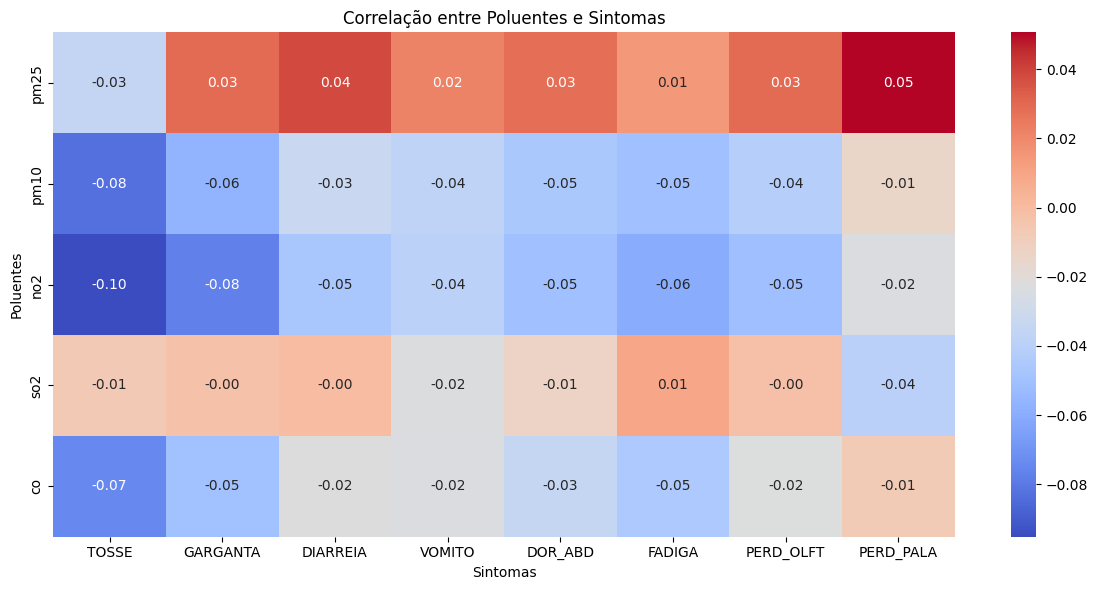

In [29]:
# Poluentes e sintomas
colunas_poluentes = ['pm25', 'pm10', 'no2', 'so2', 'co']
colunas_sintomas = ['TOSSE', 'GARGANTA', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']

# Subset do dataframe apenas com os dados relevantes
df_corr = df_normalizado[colunas_poluentes + colunas_sintomas]

# Calcula a correlação entre sintomas e poluentes
correlacoes = df_corr[colunas_sintomas].corrwith(df_corr[colunas_poluentes], axis=0)

# Matriz de correlação completa entre sintomas e poluentes
matriz_correlacao = df_corr[colunas_sintomas].corrwith(df_corr[colunas_poluentes], axis=1)

# Para uma visualização cruzada (poluentes x sintomas):
matriz_cross = df_corr[colunas_poluentes].T.corrwith(df_corr[colunas_sintomas], axis=1)
matriz = df_corr[colunas_poluentes + colunas_sintomas].corr().loc[colunas_poluentes, colunas_sintomas]

# Plotar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Poluentes e Sintomas')
plt.ylabel('Poluentes')
plt.xlabel('Sintomas')
plt.tight_layout()
plt.show()

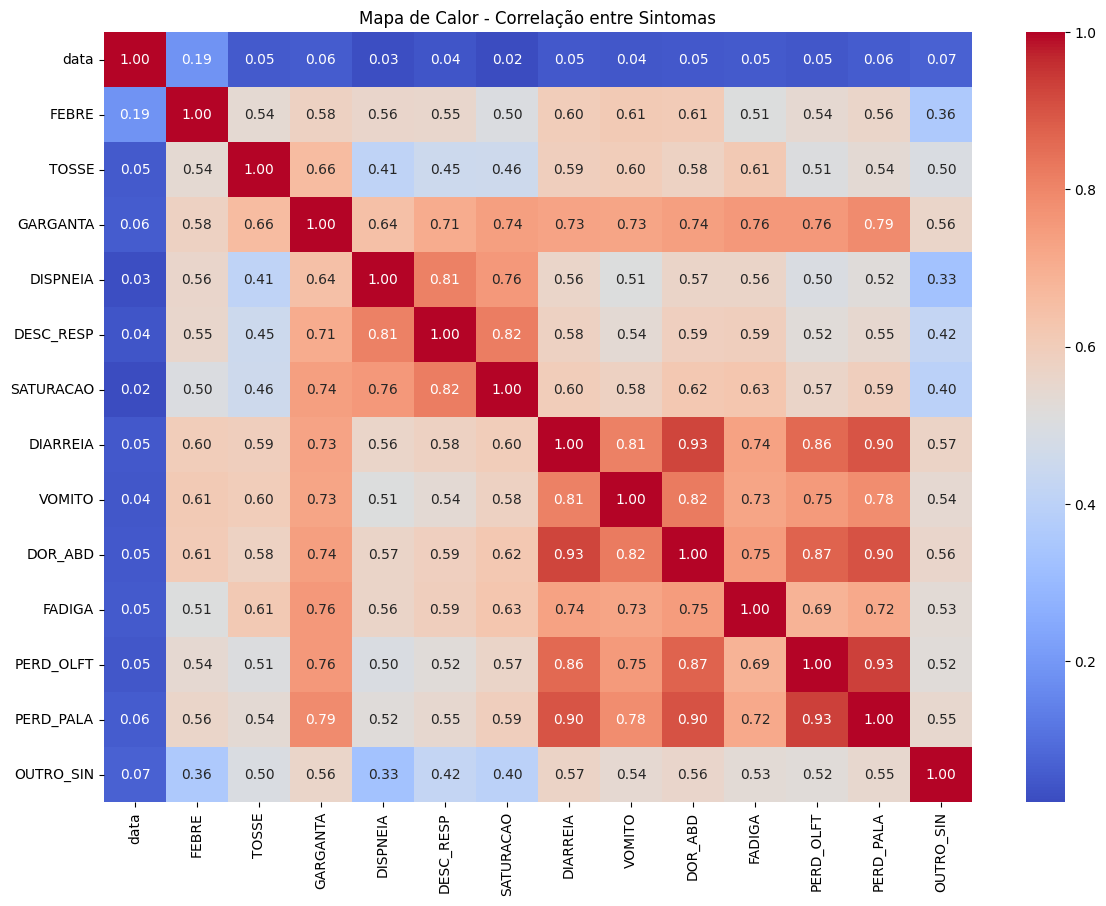

In [30]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_cidade_sintomas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Correlação entre Sintomas")
plt.show()

## Análise temporal

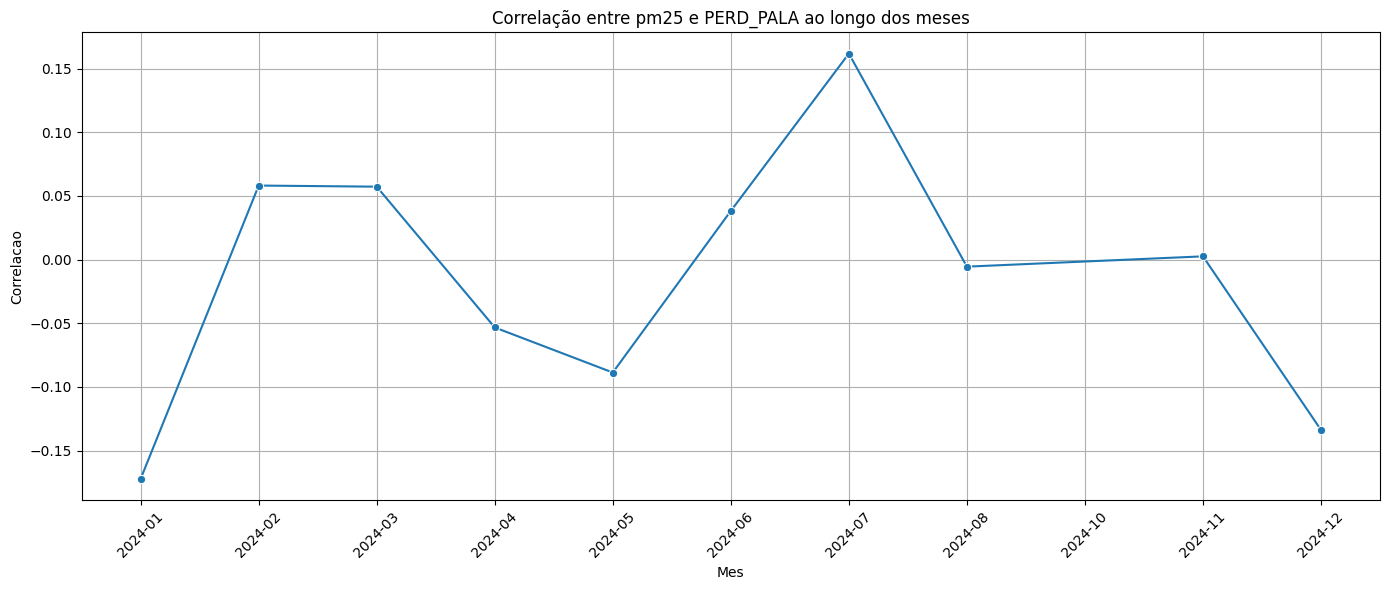

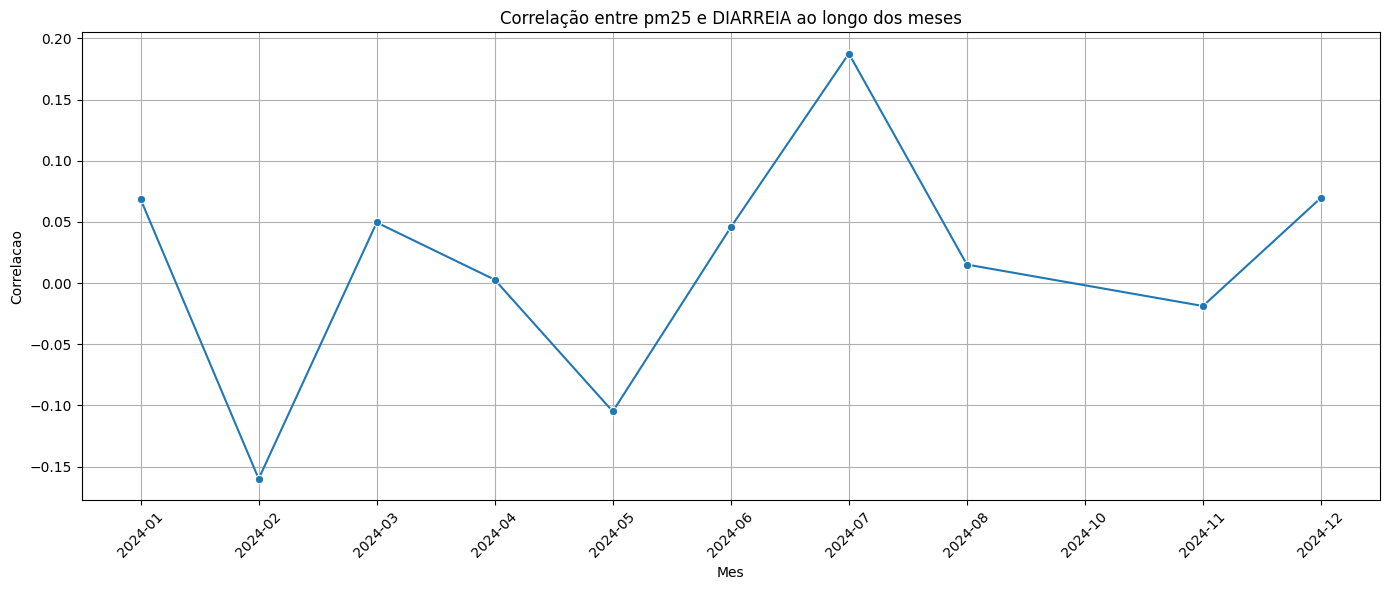

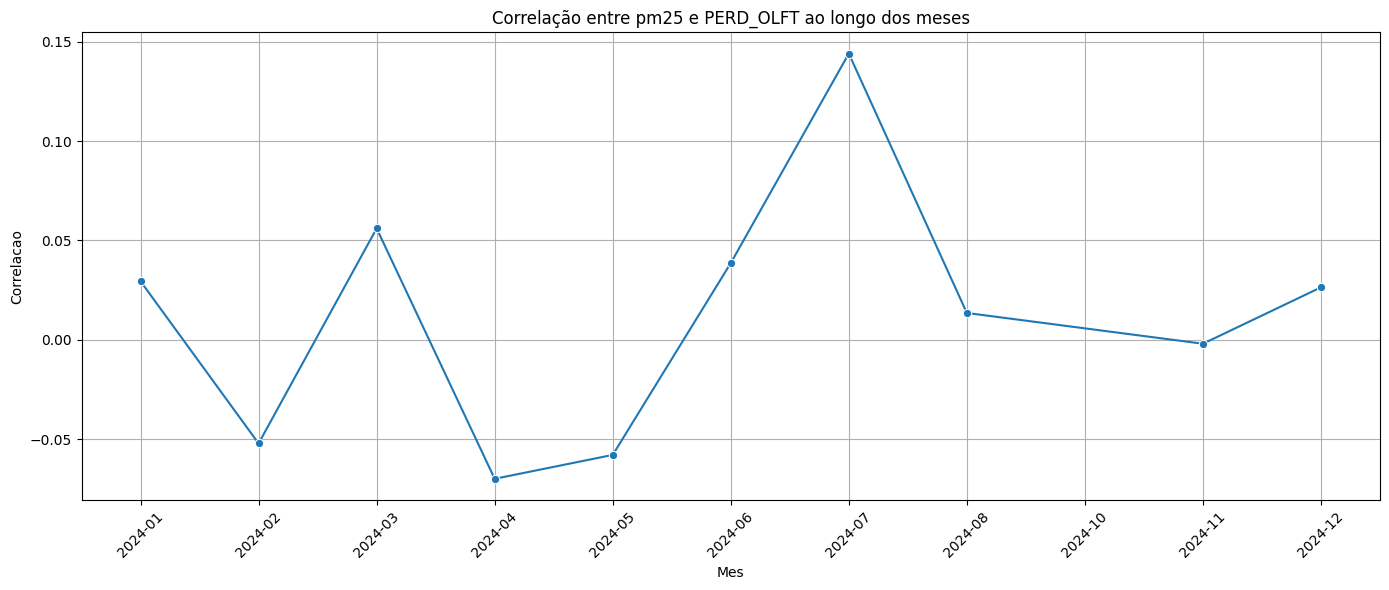

In [31]:
# Converte a coluna de data (ajuste se o nome for diferente)
df_normalizado['data'] = pd.to_datetime(df_normalizado['data'])
df_normalizado['mes'] = df_normalizado['data'].dt.to_period('M').astype(str)

# DataFrame para armazenar os resultados
correlacoes = []

# Itera por cada mês
for mes, grupo in df_normalizado.groupby('mes'):
    matriz = grupo[colunas_poluentes + colunas_sintomas].corr()
    for poluente in colunas_poluentes:
        for sintoma in colunas_sintomas:
            corr = matriz.loc[poluente, sintoma]
            correlacoes.append({
                'Mes': mes,
                'Poluente': poluente,
                'Sintoma': sintoma,
                'Correlacao': corr
            })

# Converte em DataFrame
df_corr = pd.DataFrame(correlacoes)

poluente_analisado = 'pm25'

# Para múltiplos sintomas
for sintoma in ['PERD_PALA', 'DIARREIA', 'PERD_OLFT']:  # Lista de sintomas
    df_corr_filtrado = df_corr[(df_corr['Poluente'] == poluente_analisado) & (df_corr['Sintoma'] == sintoma)]
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_corr_filtrado, x='Mes', y='Correlacao', marker='o')
    plt.title(f'Correlação entre {poluente_analisado} e {sintoma} ao longo dos meses')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Evolução dos Sintomas ao Longo do Tempo (Semanal)

Este gráfico mostra como os casos de sintomas evoluíram ao longo do tempo, com uma agregação semanal.

Ajuda a identificar tendências, surtos ou períodos de alta notificação de sintomas.

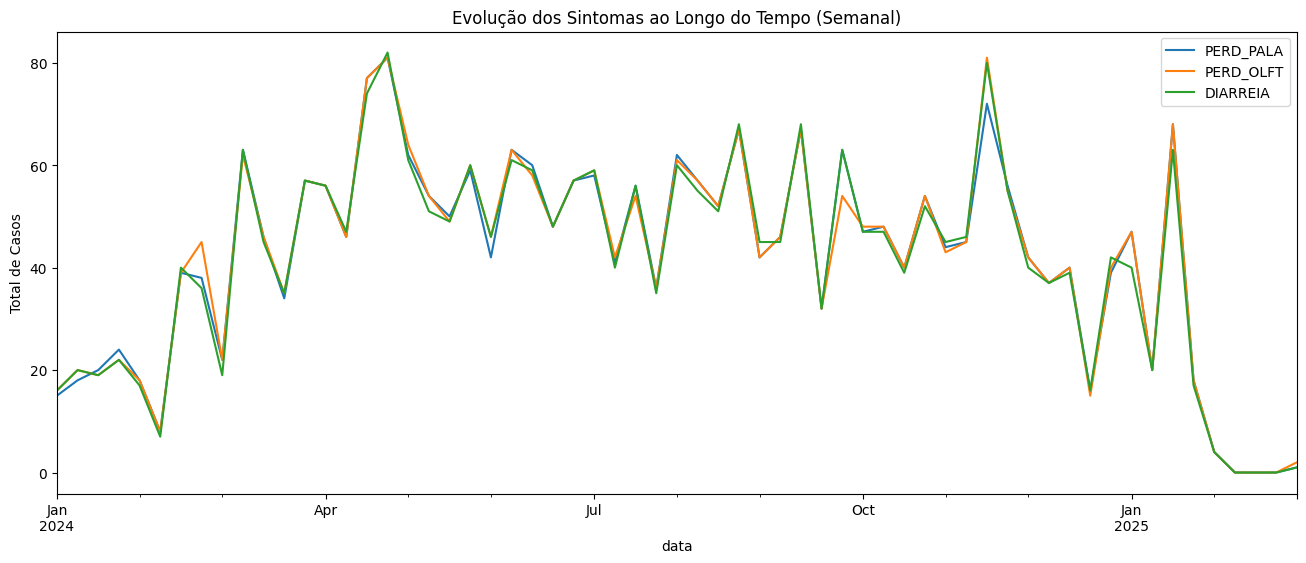

In [32]:
df_sintomas_analisados = df_cidade_sintomas[['data','PERD_PALA', 'PERD_OLFT','DIARREIA']]

# sintomas ao longo do tempo
df_sintomas_analisados.set_index('data').resample('W').sum().plot(figsize=(16, 6))
plt.title("Evolução dos Sintomas ao Longo do Tempo (Semanal)")
plt.ylabel("Total de Casos")
plt.show()

## Média de Casos por Sintoma

Mostra a média de ocorrência de cada sintoma ao longo do tempo.

Ajuda a entender quais sintomas são mais comuns na população analisada.

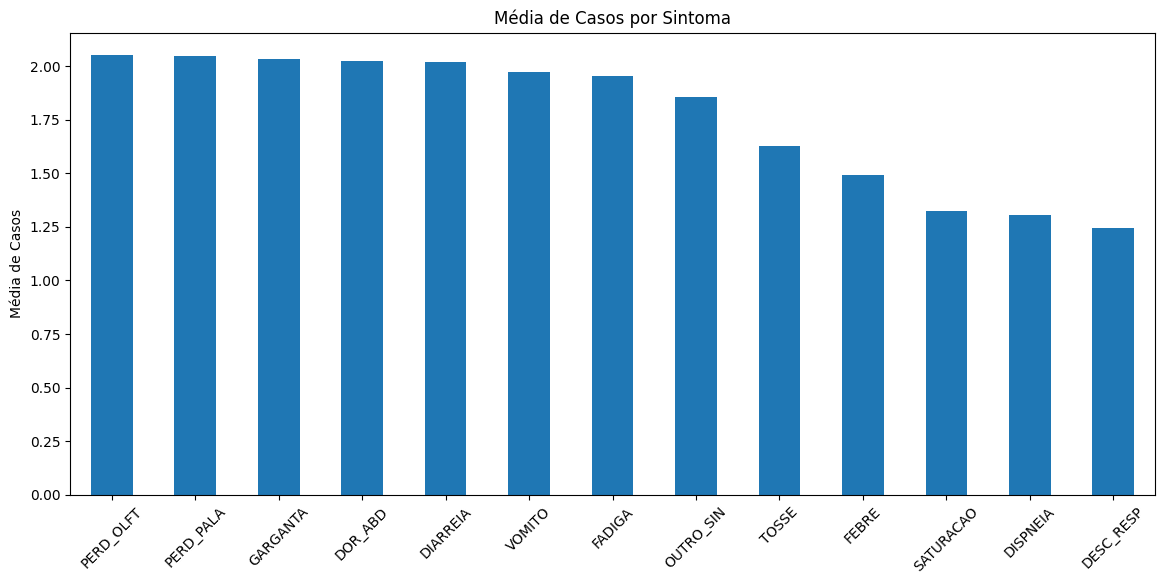

In [33]:
# Médias dos sintomas
df_cidade_sintomas.drop(columns='data').mean().sort_values(ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title("Média de Casos por Sintoma")
plt.ylabel("Média de Casos")
plt.xticks(rotation=45)
plt.show()


## Concentração Média dos Poluentes em Osasco

Este gráfico mostra a concentração média dos principais poluentes atmosféricos registrados em Osasco.
 
Cada barra representa a média de um tipo de poluente ao longo do período analisado. 

Esse tipo de visualização é essencial para identificar quais poluentes estão mais presentes 
na atmosfera local e quais podem ter maior impacto sobre a saúde pública.


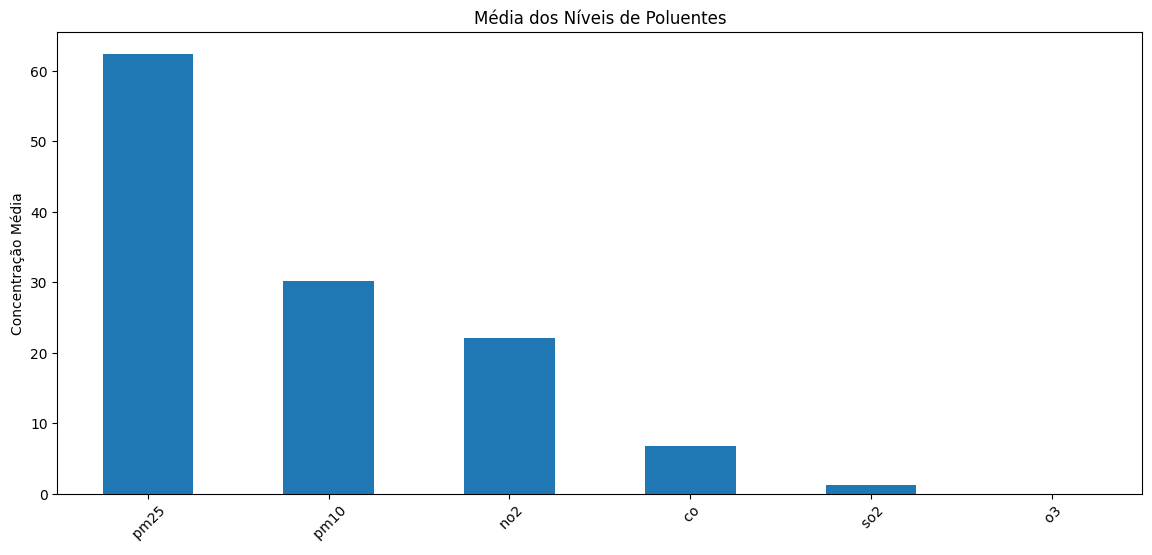

In [34]:
# Convertendo colunas para numéricas (forçando erros para NaN onde não for possível)
df_numeric = df_poluicao_cidade.drop(columns='data', errors='ignore').apply(pd.to_numeric, errors='coerce')

# Agora podemos calcular as médias corretamente
df_numeric.mean().sort_values(ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title("Média dos Níveis de Poluentes")
plt.ylabel("Concentração Média")
plt.xticks(rotation=45)
plt.show()

